# Devoir maison : Analyse de données avec réseaux de neurones

In [24]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

## 1 - Analyse des ventes de pneus

We read the file ```tires-sales.csv```, and specify that the 0 values are equal to Nan.

In [59]:
df = pd.read_csv("tires-sales.csv", na_values=0)
df.head(10)

Week  2017  2018  2019  2020  2021  2022
0     1   8.0   9.0  10.0  12.0  16.0   9.0
1     2  10.0  11.0  12.0  14.0  18.0  11.0
2     3  12.0  13.0  14.0  16.0  20.0  13.0
3     4  19.0  20.0  20.0  23.0  27.0  19.0
4     5  23.0  22.0  22.0  27.0  31.0  21.0
5     6  23.0  23.0  23.0  28.0  32.0  22.0
6     7   NaN   NaN  15.0  17.0  21.0  14.0
7     8   7.0   7.0   8.0  10.0   NaN   7.0
8     9   5.0   5.0   6.0   8.0  12.0   5.0
9    10   6.0   6.0   NaN   9.0  13.0   5.0

We preprocess our data by melting the "Year" column into the "Week" column.

In [60]:
df = df.melt("Week",var_name="Year",value_name="Sales")
df['Year'] = df['Year'].apply(str)
df.head(10)

Week  Year  Sales
0     1  2017    8.0
1     2  2017   10.0
2     3  2017   12.0
3     4  2017   19.0
4     5  2017   23.0
5     6  2017   23.0
6     7  2017    NaN
7     8  2017    7.0
8     9  2017    5.0
9    10  2017    6.0

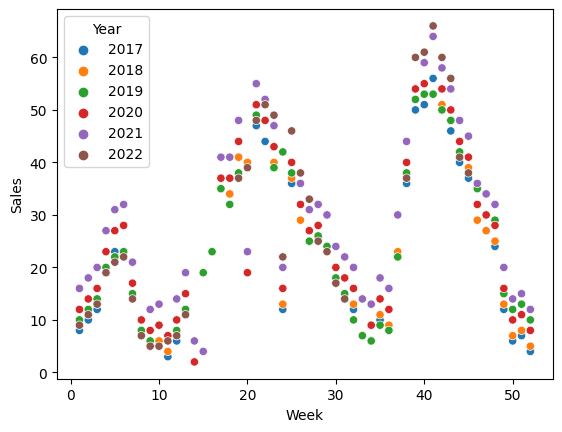

In [61]:
sns.scatterplot(data=df, x="Week", y="Sales", hue="Year")
plt.savefig('scatterplot_unfilled_sales.svg')
plt.show()

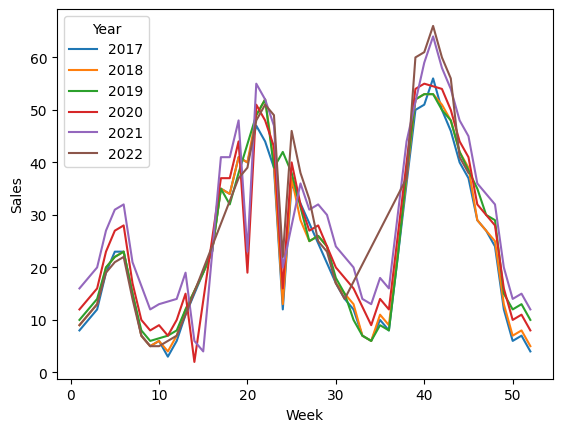

In [62]:
sns.lineplot(data=df, x="Week", y="Sales", hue="Year")
plt.savefig('lineplot_unfilled_sales.svg')
plt.show()

In [63]:
# We then transform the dataframe into a numpy array to train / test our model
data = df.dropna().to_numpy()
x, y = data[:, [0, 1]], data[:, 2]
x = np.asarray(x).astype('float32')
print(x)

[[1.000e+00 2.017e+03]
 [2.000e+00 2.017e+03]
 [3.000e+00 2.017e+03]
 [4.000e+00 2.017e+03]
 [5.000e+00 2.017e+03]
 [6.000e+00 2.017e+03]
 [8.000e+00 2.017e+03]
 [9.000e+00 2.017e+03]
 [1.000e+01 2.017e+03]
 [1.100e+01 2.017e+03]
 [1.200e+01 2.017e+03]
 [1.300e+01 2.017e+03]
 [1.600e+01 2.017e+03]
 [1.700e+01 2.017e+03]
 [1.800e+01 2.017e+03]
 [1.900e+01 2.017e+03]
 [2.000e+01 2.017e+03]
 [2.100e+01 2.017e+03]
 [2.200e+01 2.017e+03]
 [2.300e+01 2.017e+03]
 [2.400e+01 2.017e+03]
 [2.500e+01 2.017e+03]
 [3.000e+01 2.017e+03]
 [3.100e+01 2.017e+03]
 [3.200e+01 2.017e+03]
 [3.300e+01 2.017e+03]
 [3.400e+01 2.017e+03]
 [3.500e+01 2.017e+03]
 [3.600e+01 2.017e+03]
 [3.700e+01 2.017e+03]
 [3.800e+01 2.017e+03]
 [3.900e+01 2.017e+03]
 [4.000e+01 2.017e+03]
 [4.100e+01 2.017e+03]
 [4.200e+01 2.017e+03]
 [4.300e+01 2.017e+03]
 [4.400e+01 2.017e+03]
 [4.500e+01 2.017e+03]
 [4.600e+01 2.017e+03]
 [4.700e+01 2.017e+03]
 [4.800e+01 2.017e+03]
 [4.900e+01 2.017e+03]
 [5.000e+01 2.017e+03]
 [5.100e+01

In [64]:
scaler = StandardScaler()
x = scaler.fit_transform(x,y)
x = np.asarray(x).astype('float32')
y = np.asarray(y).astype('float32')
print(x[::15])

[[-1.6659408  -1.4429427 ]
 [-0.48265117 -1.4429427 ]
 [ 0.76637673 -1.4429427 ]
 [-1.6659408  -0.8364558 ]
 [-0.5483895  -0.8364558 ]
 [ 0.4376852  -0.8364558 ]
 [ 1.4237599  -0.8364558 ]
 [-0.94281936 -0.229969  ]
 [ 0.24047026 -0.229969  ]
 [ 1.2922833  -0.229969  ]
 [-1.1400342   0.37651786]
 [-0.02248299  0.37651786]
 [ 1.226545    0.37651786]
 [-1.1400342   0.98300475]
 [ 0.04325532  0.98300475]
 [ 1.0950683   0.98300475]
 [-1.3372492   1.5894916 ]
 [-0.02248299  1.5894916 ]]


In [65]:
# We then split the data to estimate the accuracy of our model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(len(x_train), len(x_test))
x_train = np.asarray(x_train).astype('float32')
x_test = np.asarray(x_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

215 54


We then scale the data to improve our model.

In [54]:
# Build the model
model = Sequential()
model.add(Dense(units=20, input_dim=x_train.shape[1]))
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='rmsprop', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=100)

print("Jeu d'apprentissage :")
print(model.evaluate(x_train, y_train))
print("Jeu de test :")
print(model.evaluate(x_test, y_test))

Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 909.1743
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 905.2330
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 902.1884
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 899.3141
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 896.4715
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 893.5664
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 890.7070
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 887.7071
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 884.5861
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 881.3918
Epoch 11/100
7/7 [==============================] - 0s 6ms/step - loss: 878.0746
Epoch 12/100
7/7 [==============================] - 0s 4ms/step - loss: 874.6716
Epoch 13/100
7/7 [===================

In [68]:
# Build the model
model = Sequential()
model.add(Dense(units=100, input_dim=x_train.shape[1]))
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='rmsprop', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=100)

print("Jeu d'apprentissage :")
print(model.evaluate(x_train, y_train))
print("Jeu de test :")
print(model.evaluate(x_test, y_test))

Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 904.7650
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 895.6339
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 888.3305
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 880.8522
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 873.2255
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 865.1434
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 856.7220
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 847.7794
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 838.3948
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 828.5819
Epoch 11/100
7/7 [==============================] - 0s 3ms/step - loss: 818.4797
Epoch 12/100
7/7 [==============================] - 0s 2ms/step - loss: 807.7407
Epoch 13/100
7/7 [===================

In [66]:
# Build the model
model = Sequential()
model.add(Dense(units=20, input_dim=x_train.shape[1]))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='rmsprop', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=100)

print("Jeu d'apprentissage :")
print(model.evaluate(x_train, y_train))
print("Jeu de test :")
print(model.evaluate(x_test, y_test))

Epoch 1/100
7/7 [==============================] - 0s 1ms/step - loss: 920.9986
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 911.1982
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 904.1166
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 897.9702
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 892.4547
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 887.1371
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 882.0406
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 876.9240
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 871.8538
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 866.7919
Epoch 11/100
7/7 [==============================] - 0s 2ms/step - loss: 861.5439
Epoch 12/100
7/7 [==============================] - 0s 2ms/step - loss: 855.9752
Epoch 13/100
7/7 [===================

In [110]:
# Build the model
model = Sequential()
model.add(Dense(units=80, input_dim=x_train.shape[1]))
model.add(Dense(units=80, activation='relu'))
model.add(Dense(units=80, activation='relu'))
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='rmsprop', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=1000)

print("Jeu d'apprentissage :")
print(model.evaluate(x_train, y_train))
print("Jeu de test :")
print(model.evaluate(x_test, y_test))

Epoch 1/1000
7/7 [==============================] - 1s 2ms/step - loss: 883.1661
Epoch 2/1000
7/7 [==============================] - 0s 2ms/step - loss: 810.8339
Epoch 3/1000
7/7 [==============================] - 0s 3ms/step - loss: 715.9297
Epoch 4/1000
7/7 [==============================] - 0s 2ms/step - loss: 602.3588
Epoch 5/1000
7/7 [==============================] - 0s 3ms/step - loss: 484.7180
Epoch 6/1000
7/7 [==============================] - 0s 3ms/step - loss: 390.0789
Epoch 7/1000
7/7 [==============================] - 0s 2ms/step - loss: 338.9360
Epoch 8/1000
7/7 [==============================] - 0s 3ms/step - loss: 318.7383
Epoch 9/1000
7/7 [==============================] - 0s 3ms/step - loss: 307.0258
Epoch 10/1000
7/7 [==============================] - 0s 3ms/step - loss: 300.1209
Epoch 11/1000
7/7 [==============================] - 0s 3ms/step - loss: 299.6237
Epoch 12/1000
7/7 [==============================] - 0s 2ms/step - loss: 294.0135
Epoch 13/1000
7/7 [======

In [111]:
# We can now add our predictions to our original dataframe.

predictions = model.predict(scaler.fit_transform(np.asarray(df.to_numpy()).astype('float32')[:, [0, 1]]))
df = df.assign(Predictions=predictions)
df.head(20)

10/10 [==============================] - 0s 1ms/step


Week  Year      Sales  Predictions
0      1  2017   8.000000    12.059380
1      2  2017  10.000000    11.482157
2      3  2017  12.000000    10.904930
3      4  2017  19.000000    10.327698
4      5  2017  23.000000     9.750467
5      6  2017  23.000000     9.173248
6      7  2017  11.097591     8.596022
7      8  2017   7.000000     8.018789
8      9  2017   5.000000     7.441570
9     10  2017   6.000000     6.864345
10    11  2017   3.000000     6.524286
11    12  2017   6.000000     7.211744
12    13  2017  11.000000     7.899204
13    14  2017  11.339982     8.952213
14    15  2017  16.920761    16.267767
15    16  2017  23.000000    23.982868
16    17  2017  35.000000    30.773664
17    18  2017  34.000000    34.705265
18    19  2017  41.000000    38.672440
19    20  2017  40.000000    42.639603

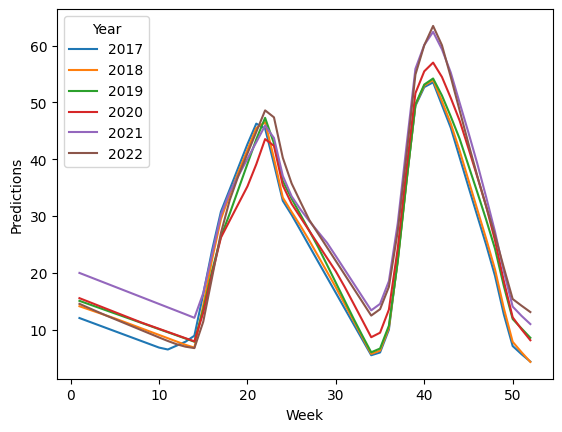

In [112]:
printable_df = df
printable_df['Year'] = printable_df['Year'].apply(str)
sns.lineplot(data=printable_df, x="Week", y="Predictions", hue="Year")
plt.savefig('seperate_input_predictions_balanced.svg')
plt.show()

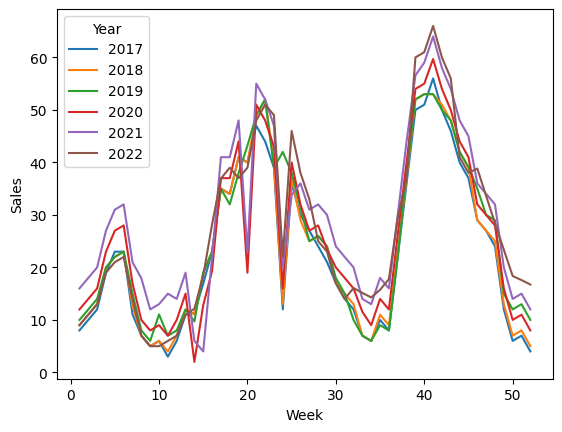

In [97]:
df['Sales'].fillna(df['Predictions'], inplace=True)
del df['Predictions']

sns.lineplot(data=df, x="Week", y="Sales", hue="Year")
plt.savefig('seperate_input_filledna.svg')
plt.show()

Epoch 1/1000
7/7 [==============================] - 1s 4ms/step - loss: 804.4615
Epoch 2/1000
7/7 [==============================] - 0s 5ms/step - loss: 349.0934
Epoch 3/1000
7/7 [==============================] - 0s 5ms/step - loss: 316.4030
Epoch 4/1000
7/7 [==============================] - 0s 5ms/step - loss: 310.0497
Epoch 5/1000
7/7 [==============================] - 0s 5ms/step - loss: 304.7036
Epoch 6/1000
7/7 [==============================] - 0s 4ms/step - loss: 288.6192
Epoch 7/1000
7/7 [==============================] - 0s 4ms/step - loss: 292.8777
Epoch 8/1000
7/7 [==============================] - 0s 4ms/step - loss: 269.7014
Epoch 9/1000
7/7 [==============================] - 0s 4ms/step - loss: 273.4081
Epoch 10/1000
7/7 [==============================] - 0s 3ms/step - loss: 266.2337
Epoch 11/1000
7/7 [==============================] - 0s 4ms/step - loss: 245.0662
Epoch 12/1000
7/7 [==============================] - 0s 4ms/step - loss: 252.9918
Epoch 13/1000
7/7 [======

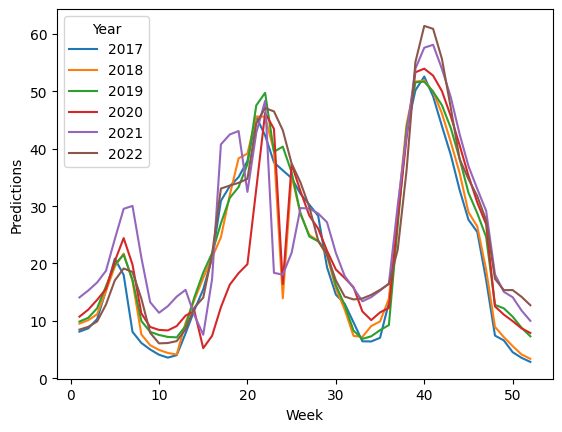

In [109]:
# Build the model
model = Sequential()
model.add(Dense(units=100, input_dim=x_train.shape[1]))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='rmsprop', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=1000)

print("Jeu d'apprentissage :")
print(model.evaluate(x_train, y_train))
print("Jeu de test :")
print(model.evaluate(x_test, y_test))

predictions = model.predict(scaler.fit_transform(np.asarray(df.to_numpy()).astype('float32')[:, [0, 1]]))
df = df.assign(Predictions=predictions)

printable_df = df
printable_df['Year'] = printable_df['Year'].apply(str)
sns.lineplot(data=printable_df, x="Week", y="Predictions", hue="Year")
plt.savefig('seperate_input_predictions_overfitting.svg')
plt.show()

Epoch 1/1000
7/7 [==============================] - 1s 3ms/step - loss: 898.4249
Epoch 2/1000
7/7 [==============================] - 0s 3ms/step - loss: 873.3748
Epoch 3/1000
7/7 [==============================] - 0s 3ms/step - loss: 855.7978
Epoch 4/1000
7/7 [==============================] - 0s 3ms/step - loss: 839.8751
Epoch 5/1000
7/7 [==============================] - 0s 3ms/step - loss: 824.5897
Epoch 6/1000
7/7 [==============================] - 0s 2ms/step - loss: 808.9852
Epoch 7/1000
7/7 [==============================] - 0s 2ms/step - loss: 793.0556
Epoch 8/1000
7/7 [==============================] - 0s 3ms/step - loss: 776.6520
Epoch 9/1000
7/7 [==============================] - 0s 3ms/step - loss: 759.4543
Epoch 10/1000
7/7 [==============================] - 0s 3ms/step - loss: 741.5281
Epoch 11/1000
7/7 [==============================] - 0s 3ms/step - loss: 722.5102
Epoch 12/1000
7/7 [==============================] - 0s 3ms/step - loss: 703.1798
Epoch 13/1000
7/7 [======

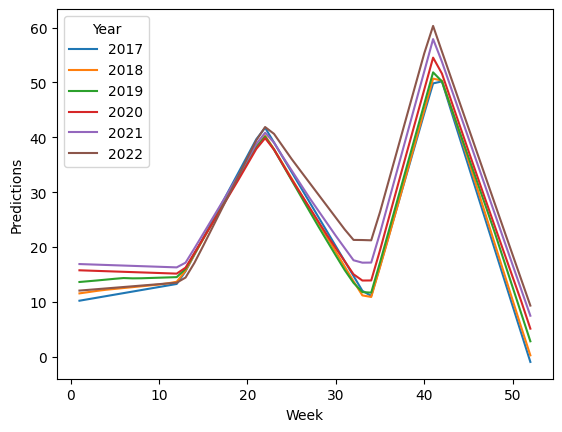

In [108]:
# Build the model
model = Sequential()
model.add(Dense(units=50, input_dim=x_train.shape[1]))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='rmsprop', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=1000)

print("Jeu d'apprentissage :")
print(model.evaluate(x_train, y_train))
print("Jeu de test :")
print(model.evaluate(x_test, y_test))

predictions = model.predict(scaler.fit_transform(np.asarray(df.to_numpy()).astype('float32')[:, [0, 1]]))
df = df.assign(Predictions=predictions)

printable_df = df
printable_df['Year'] = printable_df['Year'].apply(str)
sns.lineplot(data=printable_df, x="Week", y="Predictions", hue="Year")
plt.savefig('seperate_input_predictions_underfitting.svg')
plt.show()

### 1.2 - Approche time series

In [190]:
df = pd.read_csv("tires-sales.csv", na_values=0)
df.head(10)

Week  2017  2018  2019  2020  2021  2022
0     1   8.0   9.0  10.0  12.0  16.0   9.0
1     2  10.0  11.0  12.0  14.0  18.0  11.0
2     3  12.0  13.0  14.0  16.0  20.0  13.0
3     4  19.0  20.0  20.0  23.0  27.0  19.0
4     5  23.0  22.0  22.0  27.0  31.0  21.0
5     6  23.0  23.0  23.0  28.0  32.0  22.0
6     7   NaN   NaN  15.0  17.0  21.0  14.0
7     8   7.0   7.0   8.0  10.0   NaN   7.0
8     9   5.0   5.0   6.0   8.0  12.0   5.0
9    10   6.0   6.0   NaN   9.0  13.0   5.0

In [191]:
df = df.melt("Week",var_name="Year",value_name="Sales")

df['Year'] = df['Year'].apply(int)
df.head(10)

Week  Year  Sales
0     1  2017    8.0
1     2  2017   10.0
2     3  2017   12.0
3     4  2017   19.0
4     5  2017   23.0
5     6  2017   23.0
6     7  2017    NaN
7     8  2017    7.0
8     9  2017    5.0
9    10  2017    6.0

In [192]:
df['Time'] = pd.to_datetime(df['Week'].astype(str) + df['Year'].astype(str).add('-0'), format='%U%Y-%w')
df['Index'] = df['Week'] + df['Week'].max() * (df['Year'] - df['Year'].min())
# df['Week'] = pd.to_datetime(df['Week'].astype(str) + df['Year'].astype(str).add('-0'), format='%U%Y-%w')
# df = df.drop(['Year'], axis=1)
df.head(10)

Week  Year  Sales       Time  Index
0     1  2017    8.0 2017-01-01      1
1     2  2017   10.0 2017-01-08      2
2     3  2017   12.0 2017-01-15      3
3     4  2017   19.0 2017-01-22      4
4     5  2017   23.0 2017-01-29      5
5     6  2017   23.0 2017-02-05      6
6     7  2017    NaN 2017-02-12      7
7     8  2017    7.0 2017-02-19      8
8     9  2017    5.0 2017-02-26      9
9    10  2017    6.0 2017-03-05     10

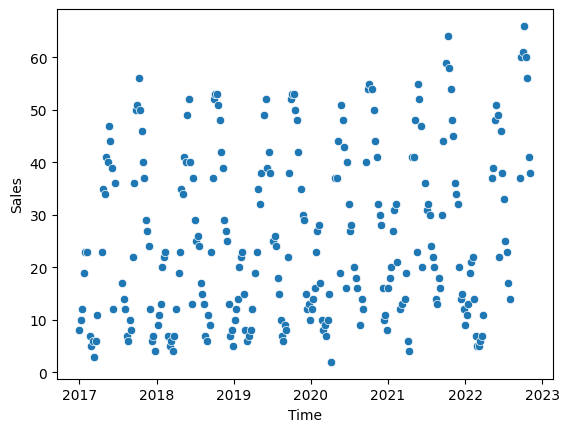

In [193]:
sns.scatterplot(data=df, x="Time", y="Sales")
plt.savefig('mixed_input_scatterplot.svg')
plt.show()

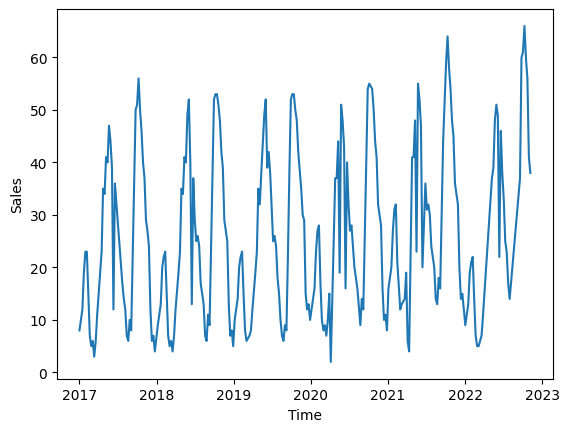

In [194]:
sns.lineplot(data=df, x="Time", y="Sales")
plt.savefig('mixed_input_lineplot.svg')
plt.show()

In [195]:
# We then transform the dataframe into a numpy array to train / test our model
data = df.dropna().to_numpy()
# print(data)
x, y = data[:, 4], data[:, 2]
x = np.asarray(x).astype('float32')
x = [[i] for i in x]
print(x[::15])

[[1.0], [19.0], [38.0], [53.0], [70.0], [85.0], [100.0], [116.0], [134.0], [150.0], [165.0], [182.0], [201.0], [217.0], [235.0], [251.0], [266.0], [286.0]]


In [196]:
scaler = StandardScaler()
x = scaler.fit_transform(x,y)
x = np.asarray(x).astype('float32')
y = np.asarray(y).astype('float32')
print(x[::15])

[[-1.7339746e+00]
 [-1.5245848e+00]
 [-1.3035622e+00]
 [-1.1290705e+00]
 [-9.3131346e-01]
 [-7.5682193e-01]
 [-5.8233041e-01]
 [-3.9620608e-01]
 [-1.8681623e-01]
 [-6.9191196e-04]
 [ 1.7379963e-01]
 [ 3.7155673e-01]
 [ 5.9257936e-01]
 [ 7.7870363e-01]
 [ 9.8809350e-01]
 [ 1.1742178e+00]
 [ 1.3487093e+00]
 [ 1.5813648e+00]]


In [197]:
# We then split the data to estimate the accuracy of our model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(len(x_train), len(x_test))
x_train = np.asarray(x_train).astype('float32')
x_test = np.asarray(x_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')
print(x_train)

215 54
[[ 1.1160539 ]
 [-1.559483  ]
 [ 1.1974834 ]
 [ 1.5232009 ]
 [ 0.5693138 ]
 [-0.5823304 ]
 [-0.32640946]
 [-0.8964152 ]
 [ 0.04583917]
 [-0.45436993]
 [-1.1407033 ]
 [ 0.8368675 ]
 [-0.16355069]
 [-0.55906487]
 [-0.14028515]
 [ 0.90666413]
 [-1.4896864 ]
 [ 0.01094086]
 [ 0.69727427]
 [ 1.7558563 ]
 [-0.803353  ]
 [-0.3845733 ]
 [ 0.8717658 ]
 [ 1.616263  ]
 [-0.12865238]
 [-1.2686638 ]
 [-0.5125338 ]
 [-0.24498007]
 [-0.11701961]
 [ 1.4999354 ]
 [-1.4547881 ]
 [ 1.26728   ]
 [ 0.20869794]
 [-1.512952  ]
 [ 1.3603421 ]
 [-0.75682193]
 [ 1.8023874 ]
 [ 0.9182969 ]
 [-0.0821213 ]
 [-0.500901  ]
 [-1.6874435 ]
 [ 0.02257363]
 [-0.9196807 ]
 [-0.8498841 ]
 [-1.0360084 ]
 [-0.8615169 ]
 [-1.3500932 ]
 [-0.21008177]
 [ 1.720958  ]
 [ 0.4878844 ]
 [ 1.418506  ]
 [-1.1872344 ]
 [-1.5478503 ]
 [-0.36130777]
 [ 0.6740087 ]
 [ 0.33665842]
 [-1.6990763 ]
 [ 0.68564147]
 [-1.3733587 ]
 [-1.3035622 ]
 [ 1.4301387 ]
 [ 0.10400301]
 [-0.93131346]
 [-0.98947734]
 [ 1.3836076 ]
 [ 0.22033072]
 [-

In [198]:
# Build the model
model = Sequential()
model.add(Dense(units=100, input_dim=x_train.shape[1]))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='rmsprop', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=3000)

print("Jeu d'apprentissage :")
print(model.evaluate(x_train, y_train))
print("Jeu de test :")
print(model.evaluate(x_test, y_test))

Epoch 1/3000
7/7 [==============================] - 1s 2ms/step - loss: 887.2992
Epoch 2/3000
7/7 [==============================] - 0s 2ms/step - loss: 818.3771
Epoch 3/3000
7/7 [==============================] - 0s 3ms/step - loss: 728.0386
Epoch 4/3000
7/7 [==============================] - 0s 3ms/step - loss: 619.9797
Epoch 5/3000
7/7 [==============================] - 0s 3ms/step - loss: 512.4680
Epoch 6/3000
7/7 [==============================] - 0s 3ms/step - loss: 423.7745
Epoch 7/3000
7/7 [==============================] - 0s 4ms/step - loss: 374.1538
Epoch 8/3000
7/7 [==============================] - 0s 3ms/step - loss: 348.1997
Epoch 9/3000
7/7 [==============================] - 0s 3ms/step - loss: 337.5453
Epoch 10/3000
7/7 [==============================] - 0s 3ms/step - loss: 328.6837
Epoch 11/3000
7/7 [==============================] - 0s 2ms/step - loss: 317.6616
Epoch 12/3000
7/7 [==============================] - 0s 3ms/step - loss: 308.5294
Epoch 13/3000
7/7 [======

In [199]:

input = np.asarray(df['Week'] + df['Week'].max() * (df['Year'] - df['Year'].min()).to_numpy())
input = scaler.fit_transform([[i] for i in input])
print(input)
predictions = model.predict(input)
# print(predictions)
df = df.assign(Predictions=predictions)
df.head(20)

[[-1.72650823]
 [-1.71540528]
 [-1.70430234]
 [-1.69319939]
 [-1.68209644]
 [-1.6709935 ]
 [-1.65989055]
 [-1.6487876 ]
 [-1.63768466]
 [-1.62658171]
 [-1.61547876]
 [-1.60437582]
 [-1.59327287]
 [-1.58216992]
 [-1.57106698]
 [-1.55996403]
 [-1.54886108]
 [-1.53775813]
 [-1.52665519]
 [-1.51555224]
 [-1.50444929]
 [-1.49334635]
 [-1.4822434 ]
 [-1.47114045]
 [-1.46003751]
 [-1.44893456]
 [-1.43783161]
 [-1.42672867]
 [-1.41562572]
 [-1.40452277]
 [-1.39341983]
 [-1.38231688]
 [-1.37121393]
 [-1.36011099]
 [-1.34900804]
 [-1.33790509]
 [-1.32680215]
 [-1.3156992 ]
 [-1.30459625]
 [-1.2934933 ]
 [-1.28239036]
 [-1.27128741]
 [-1.26018446]
 [-1.24908152]
 [-1.23797857]
 [-1.22687562]
 [-1.21577268]
 [-1.20466973]
 [-1.19356678]
 [-1.18246384]
 [-1.17136089]
 [-1.16025794]
 [-1.149155  ]
 [-1.13805205]
 [-1.1269491 ]
 [-1.11584616]
 [-1.10474321]
 [-1.09364026]
 [-1.08253732]
 [-1.07143437]
 [-1.06033142]
 [-1.04922847]
 [-1.03812553]
 [-1.02702258]
 [-1.01591963]
 [-1.00481669]
 [-0.99371

Week  Year  Sales       Time  Index  Predictions
0      1  2017    8.0 2017-01-01      1    12.746100
1      2  2017   10.0 2017-01-08      2    13.251617
2      3  2017   12.0 2017-01-15      3    13.757105
3      4  2017   19.0 2017-01-22      4    14.262592
4      5  2017   23.0 2017-01-29      5    14.768081
5      6  2017   23.0 2017-02-05      6    15.273591
6      7  2017    NaN 2017-02-12      7    15.779081
7      8  2017    7.0 2017-02-19      8    16.284584
8      9  2017    5.0 2017-02-26      9    16.790060
9     10  2017    6.0 2017-03-05     10    17.295551
10    11  2017    3.0 2017-03-12     11    17.801058
11    12  2017    6.0 2017-03-19     12    18.430889
12    13  2017   11.0 2017-03-26     13    21.628569
13    14  2017    NaN 2017-04-02     14    25.076925
14    15  2017    NaN 2017-04-09     15    28.525267
15    16  2017   23.0 2017-04-16     16    31.973583
16    17  2017   35.0 2017-04-23     17    35.421932
17    18  2017   34.0 2017-04-30     18    38.870243
18    19  2017   41.0 2017-05-07     19    41.442257
19    20  2017   40.0 2017-05-14     20    40.875946

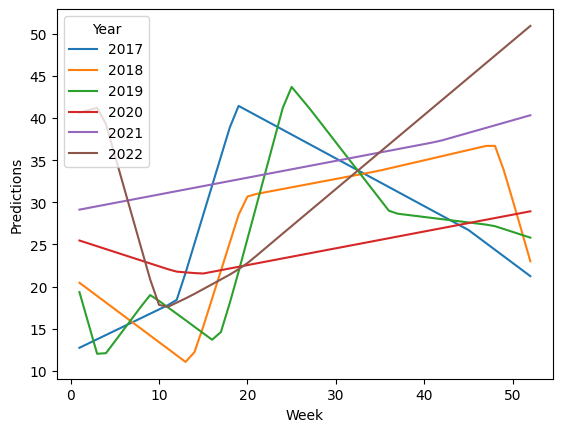

In [200]:
printable_df = df
printable_df['Year'] = printable_df['Year'].apply(str)
sns.lineplot(data=printable_df, x="Week", y="Predictions", hue="Year")
plt.savefig('mixed_input_predictions.svg')
plt.show()

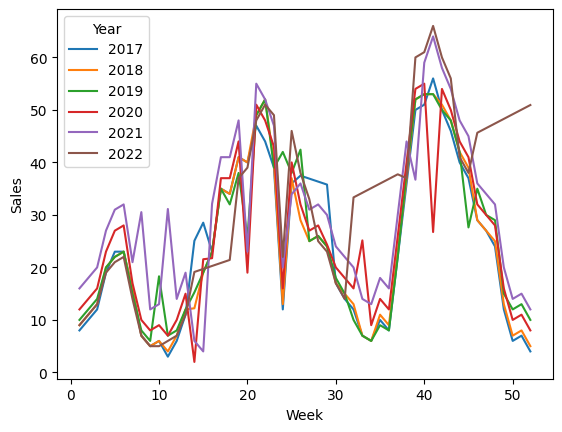

In [201]:
df['Sales'].fillna(df['Predictions'], inplace=True)
del df['Predictions']

sns.lineplot(data=df, x="Week", y="Sales", hue="Year")
plt.savefig('mixed_input_filledna.svg')
plt.show()


3) Réseau de Neurones pour prédire un état de santé

Connectez-vous sur le site https://www.kaggle.com/saurabh00007/diabetescsv et téléchargez le fichier diabete.csv ou diabete.txt.